Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable

Showing Data

In [103]:
dt = pd.read_csv('./insurance.csv')

dt.tail(9)

,patientid,age,sex,bmi,children,smoker,region,charges
1329,11330,52,male,38.6,2,no,southwest,10325.21
1330,11331,57,female,25.7,2,no,southeast,12629.17
1331,11332,23,female,33.4,0,no,southwest,10795.94
1332,11333,52,female,44.7,3,no,southwest,11411.69
1333,11334,50,male,31.0,3,no,northwest,10600.55
1334,11335,18,female,31.9,0,no,northeast,2205.98
1335,11336,18,female,36.9,0,no,southeast,1629.83
1336,11337,21,female,25.8,0,no,southwest,2007.95
1337,11338,61,female,29.1,0,yes,northwest,29141.36


In [104]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientid  1338 non-null   int64  
 1   age        1338 non-null   int64  
 2   sex        1338 non-null   object 
 3   bmi        1338 non-null   float64
 4   children   1338 non-null   int64  
 5   smoker     1338 non-null   object 
 6   region     1338 non-null   object 
 7   charges    1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [105]:
dt.describe()

,patientid,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,10669.500000,39.207025,30.665471,1.094918,13270.422414
std,386.391641,14.049960,6.098382,1.205493,12110.011240
min,10001.000000,18.000000,16.000000,0.000000,1121.870000
25%,10335.250000,27.000000,26.300000,0.000000,4740.287500
50%,10669.500000,39.000000,30.400000,1.000000,9382.030000
75%,11003.750000,51.000000,34.700000,2.000000,16639.915000
max,11338.000000,64.000000,53.100000,5.000000,63770.430000


Age

minimum age: 18, maximum age: 64


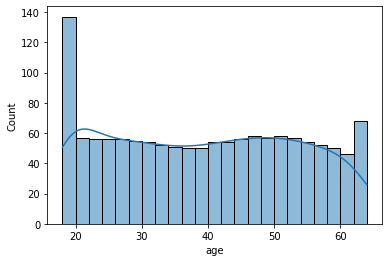

In [106]:
print(f"minimum age: {dt['age'].min()}, maximum age: {dt['age'].max()}")
sns.histplot(dt, x = "age", bins = 23, kde = True)
plt.show()

* From the above figure, we can see that, in most of the age colum ranges, the distribution of population in age colums is almost uniform except in first and last colum.

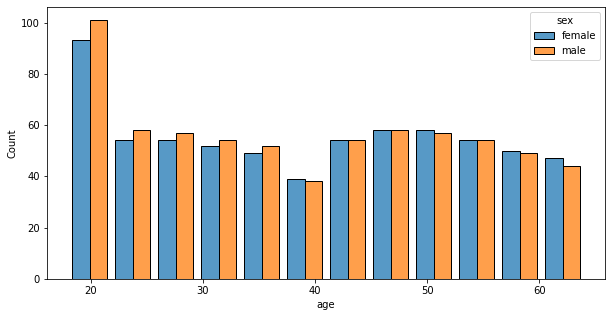

In [107]:
plt.figure(figsize = (10, 5))
sns.histplot(dt, x = "age", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()

* From the figure wa can see in each bin that the female and male are almost equal

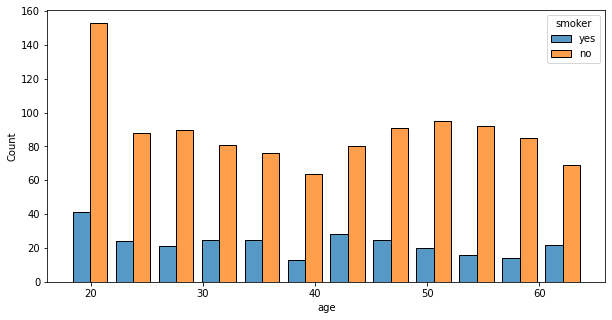

In [108]:
plt.figure(figsize = (10, 5))
sns.histplot(dt, x = "age", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()


* From the above figure, we can see thatthe population of smokers is around 1/3rd of non-smokers.

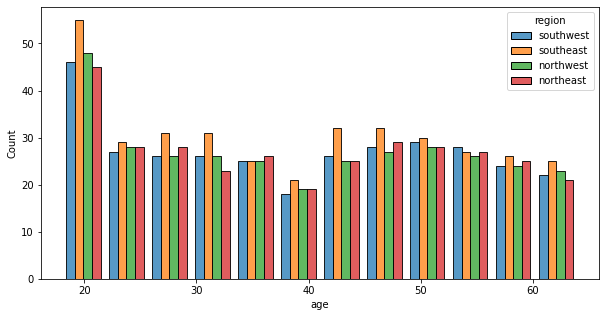

In [109]:
plt.figure(figsize = (10, 5))
sns.histplot(dt, x = "age", hue = "region", multiple = "dodge", shrink = .8)
plt.show()

* From the above figure, we can see that, in each bin, there are almost equal population from every region.

# BMI

minimum BMI: 16.0, maximum BMI: 53.1


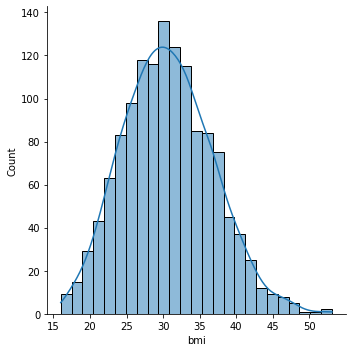

In [110]:
print(f"minimum BMI: {dt['bmi'].min()}, maximum BMI: {dt['bmi'].max()}")
sns.displot(dt, x = "bmi", kde = True)
plt.show()

<Figure size 720x360 with 0 Axes>

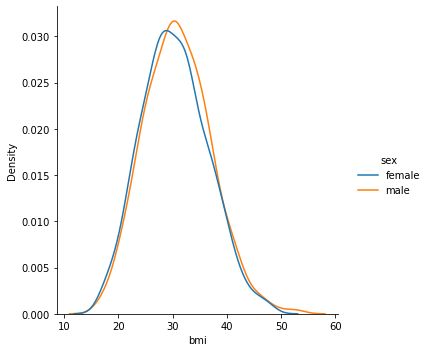

In [111]:
plt.figure(figsize = (10, 5))
sns.displot(dt, x = "bmi", hue = "sex", kind = "kde")
plt.show()


* From the above  figure we can see that the BMI for male and female are simuliar.

<Figure size 720x360 with 0 Axes>

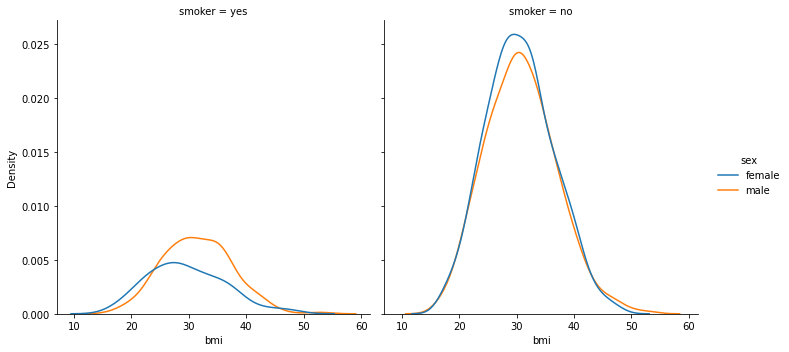

In [112]:
plt.figure(figsize = (10, 5))
sns.displot(dt, x = "bmi", hue = "sex", kind = "kde", col = "smoker")
plt.show()


Regions

<Figure size 720x504 with 0 Axes>

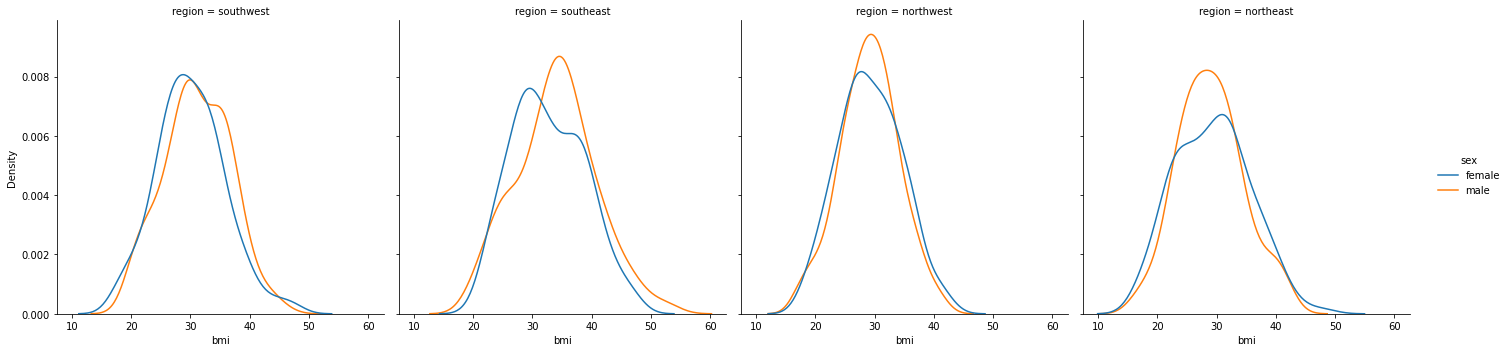

In [113]:
plt.figure(figsize = (10, 7))
sns.displot(dt, x = "bmi", hue = "sex", kind = "kde", col = "region")
plt.show()

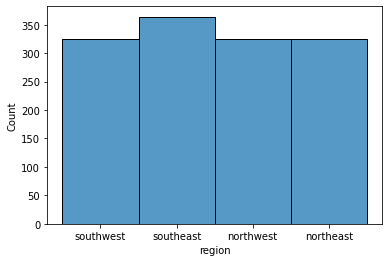

In [114]:
sns.histplot(dt, x = "region")
plt.show()

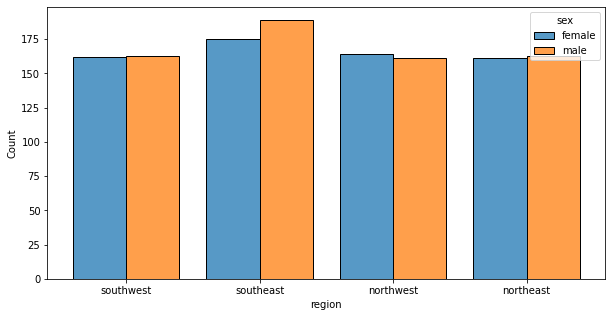

In [115]:
plt.figure(figsize = (10, 5))
sns.histplot(dt, x = "region", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()


* From the above figure, we can see that, from each region the male and female population is almost equal.

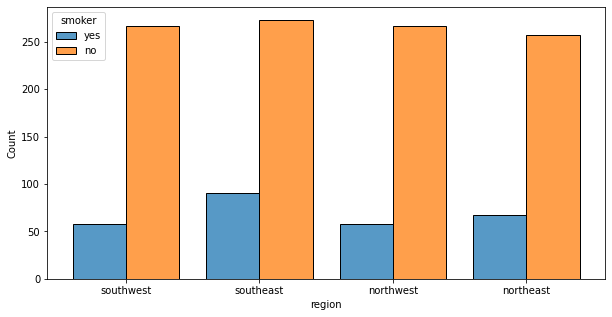

In [116]:
plt.figure(figsize = (10, 5))
sns.histplot(dt, x = "region", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()


* From the above figure, we can see that, in each region, the ratio of smoker to non-smoker is almost equal.

# Charges

minimum charge: 1121.87, maximum charge: 63770.43


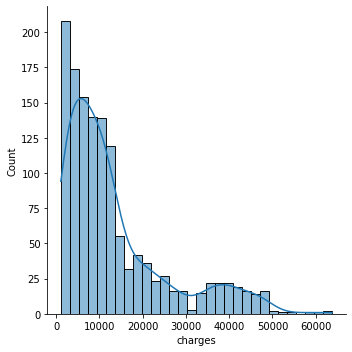

In [117]:
print(f"minimum charge: {dt['charges'].min()}, maximum charge: {dt['charges'].max()}")
sns.displot(dt, x = "charges", kde = True)
plt.show()

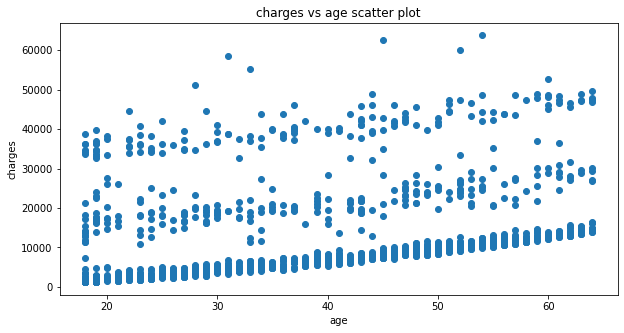

In [118]:
plt.figure(figsize = (10, 5))
plt.scatter(dt["age"], dt["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.title("charges vs age scatter plot")
plt.show()

* We can see an upward trend in charges. This is obvious as the age increses the chance of getting illness increases and medical charges increses.

<Figure size 720x360 with 0 Axes>

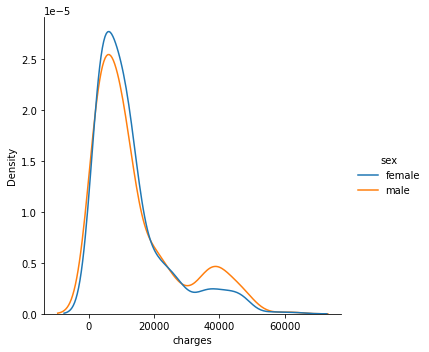

In [119]:
plt.figure(figsize = (10, 5))
sns.displot(dt, x = "charges", hue = "sex", kind = "kde")
plt.show()

<Figure size 720x360 with 0 Axes>

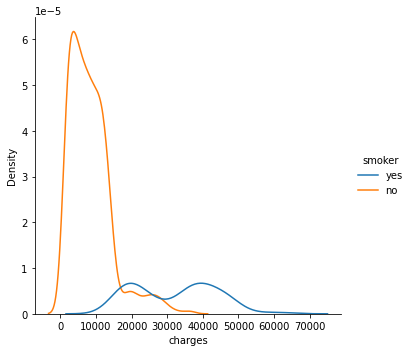

In [120]:
plt.figure(figsize = (10, 5))
sns.displot(dt, x = "charges", hue = "smoker", kind = "kde")
plt.show()

* The somkers pay higher charges compared to non-smokers

<Figure size 720x504 with 0 Axes>

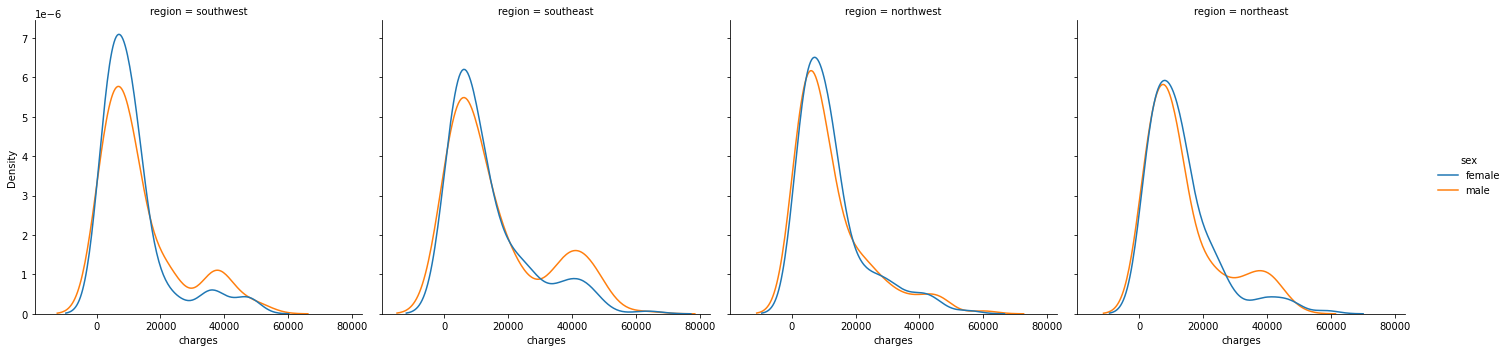

In [121]:
plt.figure(figsize = (10, 7))
sns.displot(dt, x = "charges", hue = "sex", kind = "kde", col = "region")
plt.show()

In [122]:
dt_expanded = pd.get_dummies(dt)
dt_expanded.drop(columns = ["sex_male", "smoker_no"], inplace = True)
dt_expanded.tail(5)


,patientid,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,11334,50,31.0,3,10600.55,0,0,0,1,0,0
1334,11335,18,31.9,0,2205.98,1,0,1,0,0,0
1335,11336,18,36.9,0,1629.83,1,0,0,0,1,0
1336,11337,21,25.8,0,2007.95,1,0,0,0,0,1
1337,11338,61,29.1,0,29141.36,1,1,0,1,0,0


In [123]:
train, test = train_test_split(dt_expanded, test_size = .25)

train.shape, test.shape

((1003, 11), (335, 11))

In [124]:
x_train = train.drop(columns = ["charges"])
x_test = test.drop(columns = ["charges"])
y_train = np.array(train["charges"]).reshape(-1, 1)
y_test = np.array(test["charges"]).reshape(-1, 1)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


x_train_scaled.shape, x_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((1003, 10), (335, 10), (1003, 1), (335, 1))

# Linear Regression

In [125]:
model = ElasticNet()
params = {"alpha": [.00001, .000033, .0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100], 
          "l1_ratio" : [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)


Fitting 5 folds for each of 165 candidates, totalling 825 fits


/home/mahmoud/401-class/linear-regression/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.62052275162397, tolerance: 0.08146199647319252
  model = cd_fast.enet_coordinate_descent(
/home/mahmoud/401-class/linear-regression/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5666279170687005, tolerance: 0.07956589019201099
  model = cd_fast.enet_coordinate_descent(
/home/mahmoud/401-class/linear-regression/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.54862140132941, tolerance: 0.07697458386768345
  model = cd_fast.enet_coordinate_descent(
/

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 3.3e-05, 0.0001, 0.00033, 0.001,
                                   0.0033, 0.01, 0.033, 0.1, 0.33, 1, 3.3, 10,
                                   33, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [126]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023716,0.001742,0.000850,0.000068,0.00001,0,"{'alpha': 1e-05, 'l1_ratio': 0}",-1.685811,-1.113485,-1.070888,...,1.254080,0.252181,162,-1.133839,-1.232186,-1.258758,-1.287815,-1.181044,1.218728,0.055105
1,0.005574,0.005824,0.000970,0.000110,0.00001,0.1,"{'alpha': 1e-05, 'l1_ratio': 0.1}",-1.685807,-1.113487,-1.070885,...,1.254077,0.252180,161,-1.133834,-1.232182,-1.258754,-1.287811,-1.181038,1.218724,0.055105
2,0.004533,0.005718,0.000783,0.000152,0.00001,0.2,"{'alpha': 1e-05, 'l1_ratio': 0.2}",-1.685802,-1.113489,-1.070881,...,1.254075,0.252179,160,-1.133830,-1.232177,-1.258749,-1.287807,-1.181033,1.218719,0.055105
3,0.001444,0.000288,0.000587,0.000121,0.00001,0.3,"{'alpha': 1e-05, 'l1_ratio': 0.3}",-1.685797,-1.113491,-1.070877,...,1.254072,0.252178,159,-1.133825,-1.232173,-1.258744,-1.287803,-1.181027,1.218714,0.055106


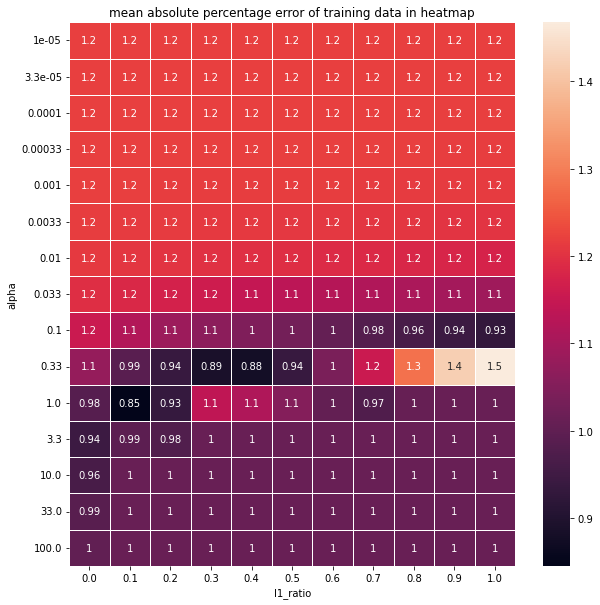

In [127]:
hmap = results.pivot("param_alpha", "param_l1_ratio", "mean_train_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.title("mean absolute percentage error of training data in heatmap")
plt.show()

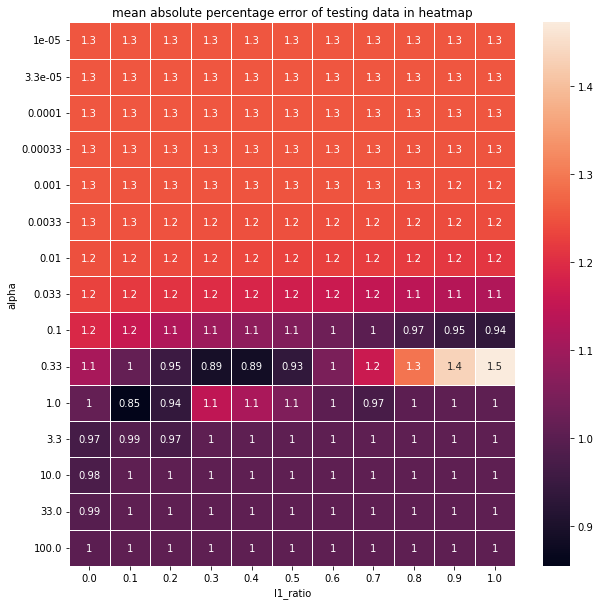

In [128]:
hmap = results.pivot("param_alpha", "param_l1_ratio", "mean_test_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.title("mean absolute percentage error of testing data in heatmap")
plt.show()

In [129]:
p = PrettyTable(["Model", "test MAPE"])
p.add_row(["Linear Regression with L1 \nand L2 regularization", "0.9429"])
print(p)

+----------------------------+-----------+
|           Model            | test MAPE |
+----------------------------+-----------+
| Linear Regression with L1  |   0.9429  |
|   and L2 regularization    |           |
+----------------------------+-----------+
